In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

freq = "1475"
ind_start = 127
ind_end = 200
data = pd.read_csv(r'/Users/brian_z/Desktop/Research/ET_hBN_fitting/S3_mat.csv')
x_list = np.linspace(1/60,5,300)
frequencies = data.columns
values = data.values
ind = np.where(frequencies == freq)[0][0]
y_list = values[:,ind]
x_list = x_list[ind_start:ind_end]
x_list = x_list - x_list[0] + 0.25
y_list = y_list[ind_start:ind_end]
y_list = y_list[::-1]
# x_list = x_list[10:]
# y_list = y_list[10:]

# plt.plot(x_list, y_list)
# plt.plot(x_list[ind_start],y_list[ind_start],"r*")
# plt.plot(x_list[ind_end],y_list[ind_end],"r*")


In [2]:
def fit_func(x, A, B, Epsilon_0, L_p, lam_p, x_A, x_B, a):
    return Epsilon_0 + A * (math.e ** (-2 * x / L_p * np.sin(4 * math.pi * (x - x_A) / lam_p))) / (x ** (1/2)) + B * (math.e ** (-x / L_p * np.sin(2 * math.pi * (x - x_B) / lam_p))) / (x ** a)
# def fit_func(x, A, B, Epsilon_0, L_p, lam_p, x_A, x_B, a):
#     return Epsilon_0 + A * (math.e ** (-2 * x / L_p * math.sin(4 * math.pi * (x - x_A) / lam_p))) / (x ** (1/2)) + B * (math.e ** (-x / L_p * math.sin(2 * math.pi * (x - x_B) / lam_p))) / (x ** a)
# def fit_func(x, a, b):
#     return a* (np.sin(x)) + b

# def fit_func(x, A, B, Epsilon_0, L_p, lam_p, x_A, x_B, a): "1400"
#     return Epsilon_0 + A * (math.e ** (-2 * x / L_p * np.sin(4 * math.pi * (x - x_A) / lam_p))) / (x ** (1/2)) + B * (math.e ** (-x / L_p * np.sin(2 * math.pi * (x - x_B) / lam_p))) / (x ** a) + 5.25542116e-10 + 2.87849263e-01 * (math.e ** (-2 * x / 1.76141737e+00 * np.sin(4 * math.pi * (x - 4.33354336e+00) / 5.77348970e+00))) / (x ** (1/2)) + 9.46007945e-01 * (math.e ** (-x / 1.76141737e+00 * np.sin(2 * math.pi * (x - 2.97882069e+00) / 5.77348970e+00))) / (x ** 2.59588092e-01)

In [3]:
popt, pcov = curve_fit(fit_func, x_list, y_list, bounds=([0.5,0.5,-10,0.2,0.05,0,0,0], 10))
# popt, pcov = curve_fit(fit_func, x_list, y_list, bounds=([0,0,0,0,0,-np.inf,-np.inf,0],10), p0 = [0.1071,0.2526,1,3,1,9.9955,2.4025,1])

In [4]:
print(popt)

[ 5.00000000e-01  1.14997909e+00 -1.93510247e+00  1.22547000e+00
  1.00000000e+01  5.86412780e+00  2.67203633e+00  1.48478375e-33]


In [5]:
# print(np.sqrt(np.diag(pcov)))

0.00013525639351942697


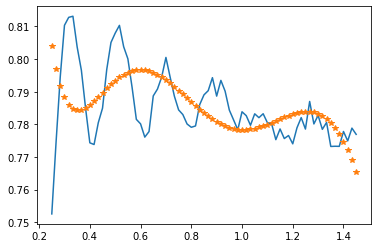

In [6]:
plt.plot(x_list, y_list)
plt.plot(x_list, fit_func(x_list, *popt), "*")
a = mean_squared_error(y_list, fit_func(x_list, *popt))
print(a)

In [7]:
# print(frequencies)